In [1]:
from glob import glob
import json
import pandas as pd

files = glob('./output/experiments_grid_search_early_stopping/*.json')

all_dicts = []

for file in files:
    with open(file, "r") as f:
        data = json.load(f)
        all_dicts.append(data)

df = pd.DataFrame(all_dicts)

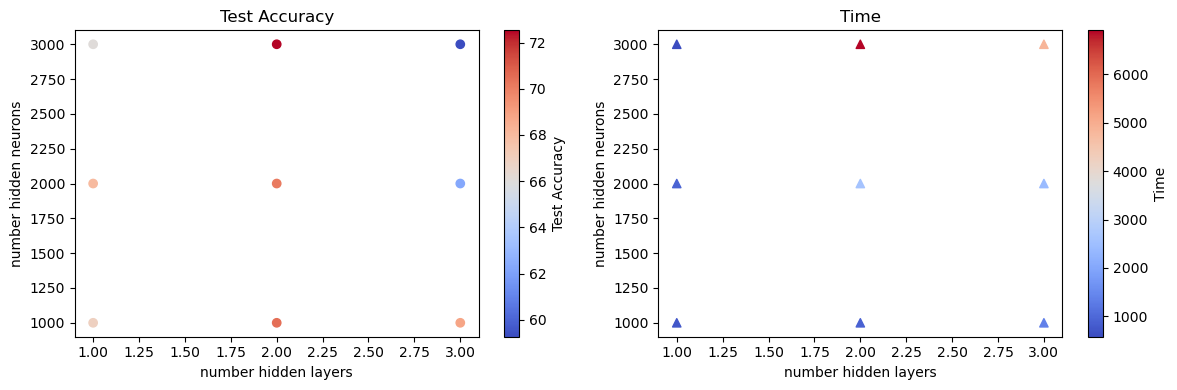

In [4]:
import matplotlib.pyplot as plt

x = df["number_hidden_layer"]
y = df["number_hidden_neurons"]
test_acc = df["test_accuracy"]
time = df["time"]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

scatter = axes[0].scatter(x, y,  c=df['test_accuracy'], cmap='coolwarm', marker='o', vmin=test_acc.min(), vmax=test_acc.max())
axes[0].set_xlabel('number hidden layers')
axes[0].set_ylabel('number hidden neurons')
axes[0].set_title('Test Accuracy')
cbar = plt.colorbar(scatter)
cbar.set_label('Test Accuracy')

scatter = axes[1].scatter(x, y,  c=time, cmap='coolwarm', marker='^', vmin=time.min(), vmax=time.max())
axes[1].set_xlabel('number hidden layers')
axes[1].set_ylabel('number hidden neurons')
axes[1].set_title('Time')
cbar = plt.colorbar(scatter)
cbar.set_label('Time')

plt.tight_layout()
plt.show()
